In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
tf.__version__, keras.__version__

('2.8.0', '2.8.0')

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [13]:
X_valid, X_train  = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0

In [14]:
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [17]:
class_names[y_train[0]]

'Coat'

### Built-in Model MLP 

In [18]:
#model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=[28,28]))
#model.add(keras.layers.Dense(300,activation="relu"))
#model.add(keras.layers.Dense(100,activation="relu"))
#model.add(keras.layers.Dense(10,activation="softmax"))

In [19]:
# mesma coisa da construcao acima
model = keras.models.Sequential([
                                keras.layers.Flatten(input_shape=[28,28]),
                                keras.layers.Dense(300,activation="relu"),
                                keras.layers.Dense(100,activation="relu"),
                                keras.layers.Dense(10,activation="softmax")
                                ])


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers

In [30]:
hidden = model.layers[1]
hidden.name

'dense_3'

In [31]:
model.get_layer('dense_3') is hidden

True

In [41]:
pesos, vies = hidden.get_weights()
pesos[:]

array([[-0.04051929,  0.01284575, -0.07088704, ..., -0.06961421,
        -0.01215369,  0.06037946],
       [-0.01971344,  0.02954117,  0.03731394, ..., -0.00372816,
        -0.0019158 ,  0.01203208],
       [-0.0496904 , -0.03047089, -0.0145485 , ...,  0.02152307,
        -0.06202372, -0.0688117 ],
       ...,
       [ 0.06609072, -0.01586112, -0.0428967 , ...,  0.02038158,
         0.00285053, -0.0518249 ],
       [ 0.05707911, -0.0607405 ,  0.03719851, ..., -0.01194815,
         0.06943309, -0.05084535],
       [-0.01990452,  0.06427175, -0.02781367, ..., -0.02573097,
         0.01675255,  0.04008214]], dtype=float32)

In [35]:
pesos.shape

(784, 300)

In [37]:
vies[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
vies.shape

(300,)

In [44]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### Fit model 

In [48]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2266 - accuracy: 0.9177 - val_loss: 0.2853 - val_accuracy: 0.8986
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2231 - accuracy: 0.9196 - val_loss: 0.3088 - val_accuracy: 0.8882
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2200 - accuracy: 0.9214 - val_loss: 0.3150 - val_accuracy: 0.8884
Epoch 4/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2158 - accuracy: 0.9237 - val_loss: 0.3110 - val_accuracy: 0.8890
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2128 - accuracy: 0.9241 - val_loss: 0.2911 - val_accuracy: 0.8942
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2102 - accuracy: 0.9252 - val_loss: 0.2882 - val_accuracy: 0.8946
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2066 - accuracy: 0.9264 - val_loss: 0.2980 - val_accuracy:

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

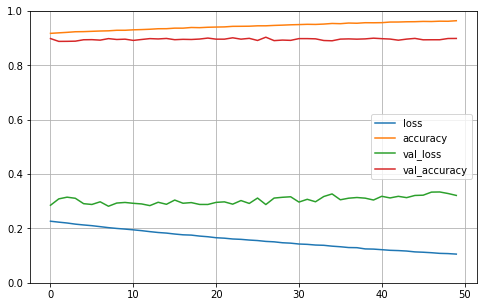

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [50]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 79.3287 - accuracy: 0.8561


[79.32865905761719, 0.8561000227928162]

In [52]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(5)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [64]:
y_pred_cl = np.argmax(y_proba, axis=1) # funcao predict_classes removida, por isso o uso de np.argmax
y_pred_cl

array([9, 2, 1], dtype=int64)

In [65]:
np.array(class_names)[y_pred_cl]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Regressão com o keras

In [67]:
housing = fetch_california_housing()

In [68]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [74]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,  validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0243 - val_loss: 0.5643
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4923 - val_loss: 0.5167
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4635 - val_loss: 0.4971
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4396 - val_loss: 0.4909
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4270 - val_loss: 0.4784
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4299 - val_loss: 0.4734
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4135 - val_loss: 0.4703
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4100 - val_loss: 0.4705
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4016 - val_loss: 0.4545
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4004 - val_loss: 0.4475

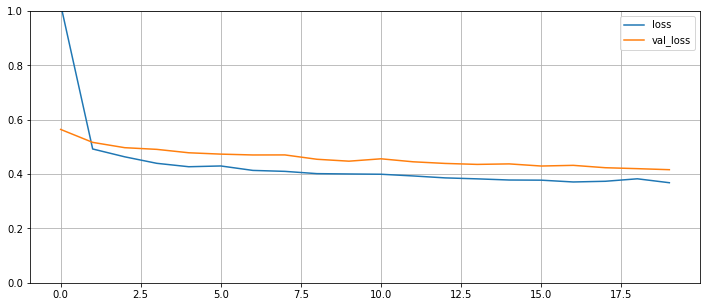

In [89]:
pd.DataFrame(history.history).plot(figsize=(12,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [82]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 2ms/step - loss: 0.3832


0.3831969201564789

In [76]:
X_new = X_test[:3]
y_pred = model.predict(X_new)